# Building a Simple Machine Learning Model on Breast Cancer Data

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant.

https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3
https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

## Phase 1 — Data Exploration

### importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

### importing the cancer dataset

In [2]:
dataset = pd.read_csv('cancer.csv')
cols = dataset.columns.tolist()
cols = cols[0:1] + cols[2:33] + [cols[1]]
dataset = dataset[cols]
dataset.head()

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimensionthread,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [4]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


### Visualisation of data

In [5]:
dataset.groupby(['diagnosis']).size()

diagnosis
B    357
M    212
dtype: int64

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

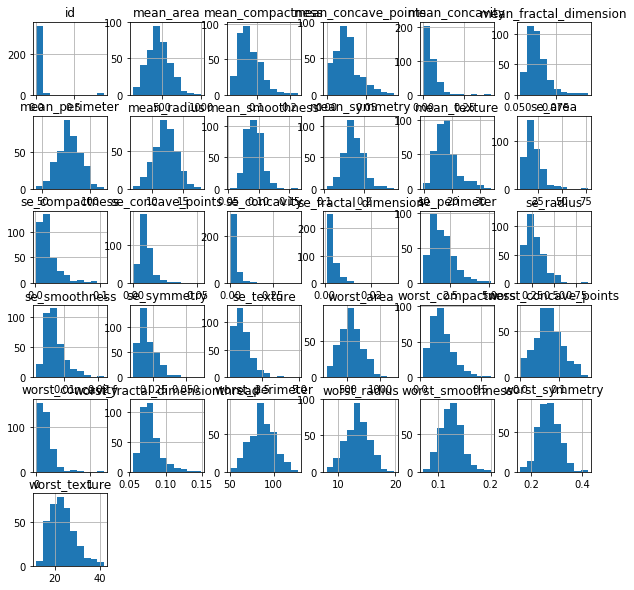

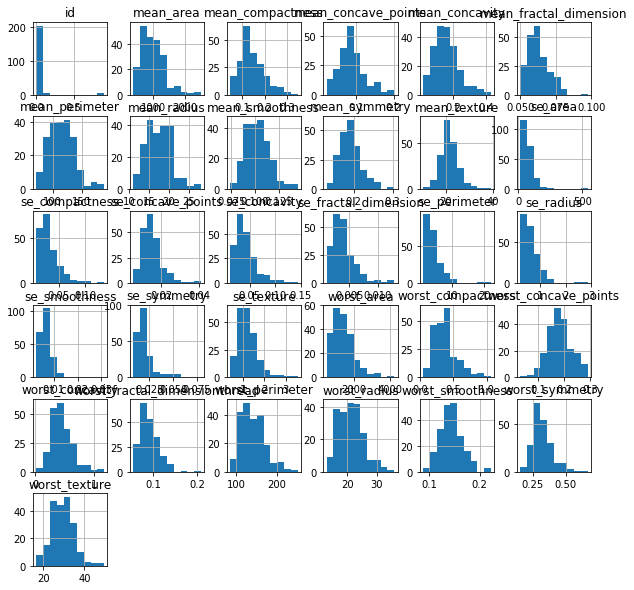

In [6]:
dataset.groupby('diagnosis').hist(figsize=(10, 10))

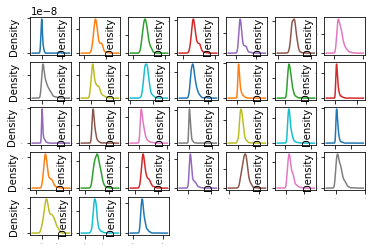

In [15]:
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

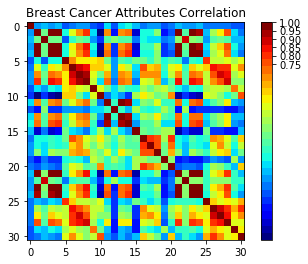

In [18]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(dataset.corr(), interpolation="none", cmap=cmap)
# ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

## Phase 2 — Categorical Data

### Encoding categorical data values 

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [8]:
y = np.bincount(Y)
ii = np.nonzero(y)[0]

list(zip(ii,y[ii]) )

[(0, 357), (1, 212)]

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Phase 3 - Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Phase 4 — Model Selection

We have different types of classification algorithms in Machine Learning :-

1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naïve Bayes
6. Decision Tree Algorithm
7. Random Forest Classification

In [11]:
from sklearn import metrics
from sklearn import model_selection

In [12]:
def evaluate(test, pred):
    print('True', test[0:25])
    print('Pred', pred[0:25])
    print()
    print('Accuracy: ', metrics.accuracy_score(test, pred))
    
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(classifier, X, Y, cv = kfold, scoring = scoring)
    print('Cross Validation Accuracy: ', results.mean())
    print()
    print(metrics.confusion_matrix(test, pred))
    print('===========================================')
    print()
    return

In [13]:
#Fitting the Logistic Regression Algorithm to the Training Set
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#95.8 Acuracy

#Fitting K-NN Algorithm
print('Nearest Neighbour')
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#95.1 Acuracy

#Fitting SVM
print('SVM')
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#97.2 Acuracy

#Fitting K-SVM
print('Kernel SVM')
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#96.5 Acuracy

#Fitting Naive_Bayes
print('Naive Bayes')
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#91.6 Acuracy

#Fitting Decision Tree Algorithm
print('Decision Tree')
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#95.8 Acuracy

#Fitting Random Forest Classification Algorithm
print('Random Forest')
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
evaluate(Y_test, Y_pred)
#98.6 Acuracy

Logistic Regression
True [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]
Pred [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1]

Accuracy:  0.958041958041958
Cross Validation Accuracy:  0.950814536340852

[[87  3]
 [ 3 50]]

Nearest Neighbour
True [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]
Pred [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]

Accuracy:  0.951048951048951
Cross Validation Accuracy:  0.9262531328320801

[[89  1]
 [ 6 47]]

SVM
True [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]
Pred [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]

Accuracy:  0.972027972027972
Cross Validation Accuracy:  0.9525689223057643

[[88  2]
 [ 2 51]]

Kernel SVM
True [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]
Pred [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1]

Accuracy:  0.965034965034965
Cross Validation Accuracy:  0.6276629072681705

[[88  2]
 [ 3 50]]

Naive Bayes
True [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1]
Pred [1 0 0 0 0 0 0 0 0 0 1 0 0

#### Baseline algorithm checking

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [24]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [25]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.922536 (0.032987) (run time: 0.123793)
SVM: 0.979014 (0.028392) (run time: 0.044399)
NB: 0.941417 (0.034815) (run time: 0.011766)
KNN: 0.962514 (0.028050) (run time: 0.024004)


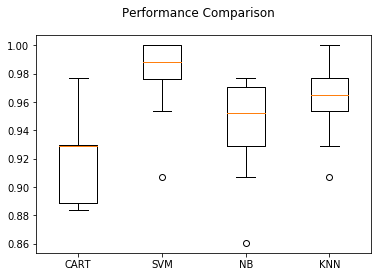

In [26]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Evaluation of algorithm on Standardised Data

In [27]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.929457 (0.039455) (run time: 0.111263)
ScaledSVM: 0.979014 (0.028392) (run time: 0.051710)
ScaledNB: 0.941417 (0.034815) (run time: 0.019225)
ScaledKNN: 0.964839 (0.028169) (run time: 0.030129)
